# IBM Applied Data Science Capstone
## WEEK 5: PEER-GRADED FINAL PROJECT
__Author:__ Bart Onkenhout  
__Created:__ 2019-04-03  
__Modified:__ 2019-04-30

### Purpose
This Python notebook is my final project submission to the IBM Applied Data Science Capstone, which counts towards the IBM Data Science Professional Certificate.

### Assignment
This week's capstone assignment is to create a full report (created separately from this notebook, but using the data in this notebook) that follows the data science methodology, in which we:  

1) clearly define a problem or idea of our choice that would require leveraging the Foursquare location API to solve or execute;  
2) describe our target audience and why they would care about our problem;  
3) describe how the necessary data will be acquired and what features can be extracted;  
4) describe any preliminary exploratory data analysis;  
5) show results;  
6) discuss these results and observations, as well as any recommendations that can be drawn from the data;  
7) conclude the report;  
8) push the notebook with our code to GitHub; and  
9) create a presentation or blogpost describing our findings (to be completed outside this notebook).

### Table of contents
Note that the table of contents in this notebook is slightly different from the final report that I am submitting. The final report document will have a more detailed breakdown according to the data science methodology. This notebook will focus on the analysis used for the methodology section, with tags for each analysis that will be referred to in the final report document.
- SECTION I: Introduction
- SECTION II: Data
- SECTION III: Analysis


---
# SECTION I: INTRODUCTION

### Background
In the previous capstone assignment in Week 3, I spent a signinificant amount of time exploring the city of __Toronto__, enriching the neighborhoods with venue data from the <a href='http://developer.foursquare.com/'>Foursquare API</a>. A nice isolated exercise to flex some of the Python muscles that have lain long-dormant. However, Toronto is really more of a proof-of-concept -- barring some out-of-the-blue job offer in Canada I don't think I'll be moving up to the Great White North. Firstly, I'm not really a cold-weather person; and secondly, I'm not sure I have enough points to qualify for an <a href='https://www.canada.ca/en/immigration-refugees-citizenship/services/immigrate-canada/express-entry.html'>ExpressEntry visa</a> ;). Canada -- you're lovely, but you're also buried in snow 80% of the time, so no thanks!

<img src='https://upload.wikimedia.org/wikipedia/commons/d/d9/Flag_of_Canada_%28Pantone%29.svg' height='192' width='96' />



So perhaps it's time to kick our analysis up another notch. In the near future, I plan to move to Europe for a work assignment. However, my employer has headquarters in several European cities. So which work assignment should I apply for? The one in <a href='https://en.wikipedia.org/wiki/Frankfurt'>Frankfurt</a>? <a href='https://en.wikipedia.org/wiki/Barcelona'>Barcelona</a>? Perhaps one in <a href='https://en.wikipedia.org/wiki/Amsterdam'>Amsterdam</a>? I'd like to find the most similar cities in Europe and do the following:  

1) find the cities in which my employer has headquarters,  
2) enrich this set of cities with data from the Foursquare API,  
3) see how this compares with my current home city of Chicago in terms of venue diversity,  
4) make a decision based on this data, and  
5) show _you_, my lovely audience (and classmates) my reasoning!  

### Why is this important?
So who really cares? Well, there's a couple of reasons why this is important.

First, it's always good to make __evidence-driven decisions__. With increasing globalization, it's important to spend one's time wisely and get the most out of every place we travel to. However, there's an increasing problem of __information overload__ -- known in psychology as the <a href='https://en.wikipedia.org/wiki/The_Paradox_of_Choice'>Paradox of Choice</a>. I'm a bit on the older side and no longer have the luxury of 'finding myself' while backpacking for months through the Continent by rail like a <a href='https://en.wikipedia.org/wiki/Bohemianism'>bohemian</a>. No--I've got _bills!_ _Student loans!_ A bedtime of _9:30 PM!_ This means I'm looking for maximum payoff with my time. And third, I __really, really__ like food, so I want to find a place that's like Chicago in its diversity of cuisine offerings. (For my fellow students who are not familiar with the US, Chicago has a reputation as a mecca for food!)

So, because I definitely can't _eat_ my way through Europe I'll need to be able to filter out some of the places I definitely _don't_ want to go. This will help me to continuously refine my selection until I have a shortlist of, say, three cities that I can choose to focus on before settling on a final decision. And data science will help me to arrive at this shortlist in a systematic, reproducible way -- unlocking the secrets of the Foursquare API in a way that we never could with Excel!.

### Problem statement
Which city/cities in Europe should I pick for my next work rotation so that I still have similar food options to Chicago?

### Stakeholder(s)
Me! (And my stomach.)

__So let's get to it!__

---
# SECTION II: DATA

### In a nutshell
In a nutshell, the data I'll need is fairly straightforward in concept. We want:

- a __list of European cities__ in which my employer has offices as a base comparison set
- __geolocation data__ of each city so we can plot everything on a map
- __Foursquare API data__ for looking up venues in each city  
- __GeoJSON shapes__ of each city so we can use a GeoJson layer to outline each city on the map


### 1. List of European cities
This list is obviously only available to employees of my company. Luckily, we have a central company directory that has the following data for each office:

- `LOCATION`: Office's official location name in our directory
- `CITY`    : City of the office
- `COUNTRY` : Country of the office

Fairly straightforward. I'll be loading each of these as a CSV file into a dict keyed on `LOCATION`, with fields like in the following example:

`offices['location']: {'city':'Frankfurt', 'country':'Germany'}`

#### Features:
- city
- country


### 2. Geolocation data
This one is a bit tougher, since Google made their Google Maps API a <a href='https://developers.google.com/maps/documentation/geocoding/usage-and-billing'>premium product</a>. However, according to Google there are USD 200 in free credits allowed every month, and the prices start at only USD 5 per 1000 requests. So if I sign up for a free account, I can make up to 40,000 requests before I need to start paying. This is one possible route.

Another possible route would be to use the OpenStreetMaps alternative API, <a href='https://wiki.openstreetmap.org/wiki/Nominatim'>Nominatim</a>. I do recall from previous usage that OSM can be finicky in which inputs it does and does not accept, so geocoding our European cities may prove difficult. Depending on the number of cities available, I may want to do this offline in Excel by hand-querying the Google Maps website, rather than using the API.

In any case, the Nominatim API can be queried using the following syntax:

`https://nominatim.openstreetmap.org/reverse?format=jsonv2&lat=-34.4391708&lon=-58.7064573`

This will return a JSON object containing geographic information on the location(s) at the specified latitude and longitude (in this example, the Aramburu highway in Argentina). The JSON object looks like this:

```
{
  "place_id":"134140761",
  "licence":"Data © OpenStreetMap contributors, ODbL 1.0. http:\/\/www.openstreetmap.org\/copyright",
  "osm_type":"way",
  "osm_id":"280940520",
"lat":"-34.4391708",
  "lon":"-58.7064573",
  "place_rank":"26",
  "category":"highway",
  "type":"motorway",
  "importance":"0.1",
  "addresstype":"road",
  "display_name":"Autopista Pedro Eugenio Aramburu, El Triángulo, Partido de Malvinas Argentinas, Buenos Aires, 1.619, Argentina",
  "name":"Autopista Pedro Eugenio Aramburu",
  "address":{
    "road":"Autopista Pedro Eugenio Aramburu",
    "village":"El Triángulo",
    "state_district":"Partido de Malvinas Argentinas",
    "state":"Buenos Aires",
    "postcode":"1.619",
    "country":"Argentina",
    "country_code":"ar"
  },
  "boundingbox":["-34.44159","-34.4370994","-58.7086067","-58.7044712"]
}
```

#### Features:
- city latitude & longitude
- addresses
- geographic location
- bounding box

### 3. Foursquare API data
This one is fairly straightforward. I've already signed up for an API key at <a href='http://developer.foursquare.com'>http://developer.foursquare.com</a>, which will allow me to make a number of calls (at no charge) to get the information I need from the various <a href='https://developer.foursquare.com/docs/api/endpoints'>endpoints</a> that are exposed by the API. The most interesting information I'll want is the __venue data__ within city limits.

We will use the `explore` endpoint to get venue recommendations based on a latitude and longitude passed in the `ll` parameter. However, according to the documentation, the non-premium API only returns __50 venues__ at a time. I'll have to use the `offset` parameter to page through the different results.

As an example, here is a list of 10 venues returned near the Willis Tower (formerly Sears Tower) in Chicago, IL (41.8789° N, 87.6359° W):

`https://api.foursquare.com/v2/venues/explore?&client_id={CLIENT_ID}&client_secret={CLIENT_SECRET}&v={API_VERSION}&ll=41.8789,-87.6359&radius={radius}`

Where `CLIENT_ID` and `CLIENT_SECRET` are the API ID and API key, `API_VERSION` is the version date of the API, `ll` is the latitude and longitude of the location I want to search around in a radius of `radius` meters.

#### Features:
- nearby venues
- venue latitude & longitude
- venue type
- venue rating


### 4. GeoJSON shapes
Luckily, the European Commission has an excellent <a href='https://ec.europa.eu/eurostat/web/gisco/geodata'>website</a> that may help us with this. In its <a href='https://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units/urban-audit#ua11-14'>Urban Audit</a> section, we can find `.shp` boundary files for each city that falls under the EC's watchful eye. I'll use <a href='https://medium.com/dataexplorations/generating-geojson-file-for-toronto-fsas-9b478a059f04'>this article</a> to convert the `.shp` files into GeoJSON files, as I did for Part 3 of the Week 3 assignment, using the open-source <a href='https://qgis.org/en/site/'>QGIS</a> software.

#### Features:
- GeoJSON polygons
- cloropleth zones

---
# SECTION III: ANALYSIS

## Install dependencies
While it is possible to use the <a href='https://wiki.openstreetmap.org/wiki/Nominatim'>Nominatim API</a>'s URL format to pull geocoding data from OpenStreetMaps, <a href='https://geopy.readthedocs.io/en/stable/'>GeoPy</a> already has a robust library of methods to access the API using Python, so I'm going to use it. I'm also going to use <a href='https://python-visualization.github.io/folium/'>Folium</a> to draw locations on the world map.

In [1]:
!pip install folium
!pip install geopy

Requirement not upgraded as not directly required: folium in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages
Requirement not upgraded as not directly required: requests in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium)
Requirement not upgraded as not directly required: branca>=0.3.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium)
Requirement not upgraded as not directly required: numpy in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium)
Requirement not upgraded as not directly required: jinja2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium)
Requirement not upgraded as not directly required: six in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium)
Requirement not upgraded as not directly required: chardet<3.1.0,>=3.0.2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests->folium)
Requirement not upgraded as not directly required: idna<2.7,

## Import packages
I'll also need to import some other libraries in order to access, interpret, and visualize various sets of data from the workbench, as well as report progress for longer queries.

In [2]:
import folium
import ibm_boto3
import json
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns
import types

from botocore.client import Config
from datetime import datetime as dt
from geopy import distance
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans
from tqdm import tqdm

## Get the list of European offices
Since I have access to my company directory, it was trivial to copy the list of locations and cities where we have offices. I imported this list into Excel and eliminated any duplicates. The first three letters of the office `location` field encode the ISO Alpha-3 code of the country in which the office operates, so I performed a simple `LEFT([cell], 3)` operation together with a `VLOOKUP` to get the full country name. I then eliminated the smaller offices based on the headcount for each office in the directory because these locations are generally satellite sales offices that won't have openings for the position that I want to apply for.

I uploaded the final list in `.csv` format to my workbench in Watson Studio and have accessed it as a streaming body object in the hidden cell below, eventually casting it to a _pandas_ DataFrame. I then add Chicago by hand (it was originally filtered out of my 'Europe-only' selection) because I want to compare it with the European cities -- which means I need to include it as a data point in my models.

In [3]:
# The code was removed by Watson Studio for sharing.

In [4]:
df_offices = pd.read_csv(body)
df_offices.columns=['location', 'city', 'country']
df_offices = df_offices.append(pd.Series(['USA-CHI','Chicago, Illinois','USA'], index=df_offices.columns), ignore_index=True)
df_offices.head()

,location,city,country
0,BEL-BRX,Brussels,Belgium
1,CHE-BRN,Bern,Switzerland
2,CHE-ZRH,Zurich,Switzerland
3,DEN-CPH,Copenhagen,Denmark
4,DEU-COL,Cologne,Germany


I don't need the location name, so I'll drop that column and add the coordinates of each city to the `df_offices` dataframe. Here's where GeoPy comes in.

In [5]:
df_offices.drop('location', axis=1, inplace=True)
cities, countries, lats, lngs, boundingboxes, geojson_strings = [],[],[],[],[],[]

## Get geolocation data for each city
Unlike the Toronto assignment, I'm not looking for each neighborhood. So that leaves a lot of wiggle room for the Nominatim API to return a non-empty result. If I query OSM for the city name and country, it should return the latitude and longitude of the city center.

I'm going to take an extra step here and also grab the `boundingbox` property, as well as the `geometry` property in GeoJson format using the `geometry=` argument. Values for both properties can be extracted using the `.raw` attribute of the location object returned by the API. This will significantly cut down on the amount of work I need to do later on when getting the GeoJSON shapes of each city.

However, GeoJSON coordinates come in many different flavors (`Polygon`, `Point`, `Multipolygon`, etc.), and only `Polygon` and `Multipolygon` contain the information needed to draw  city boundaries on the map. So anytime there is a `Point` object containing only the coordinates for the city, I'll substitute in the `boundingbox` as a `Polygon` into the GeoJSON string instead. This way I won't have to extract or convert any `.shp` files in the Eurostat database!

There's a little trick to this, namely that a `Polygon` in the GeoJSON standard requires FIVE points--not four--because the rendering engine needs to know the point to end at (in this case the starting point) in order to actually close the polygon.

I'll also hold on to the `boundingbox` information, since this will help me in determining the bounding boxes to pass to the Foursquare API to limit search results.

In [6]:
geolocator = Nominatim(user_agent='eating_my_way_through_europe')

time_start = dt.now()
n = len(df_offices['city'])
for this_city, this_country in tqdm(iterable=zip(df_offices['city'], df_offices['country']),
                                         desc=('-> Querying OSM via Nominatim (tot. {} cities)'.format(n)),
                                         total=n, ascii=True, leave=True):
    this_location = geolocator.geocode(this_city + ', ' + this_country, geometry='geojson')
    cities.append(this_city)
    countries.append(this_country)
    lats.append(this_location.latitude)
    lngs.append(this_location.longitude)   
    boundingboxes.append(this_location.raw['boundingbox'])
    if this_location.raw['geojson']['type']=='Point':
        # We will need to reinterpret the boundingbox field, which is returned as [lat1, lat2, lng1, lng2].
        # We want [[[lng1, lat1], [lng1, lat2], [lng2, lat2], ...]] as coordinates instead.
        lat1, lat2, lng1, lng2 = map(float, [e for e in this_location.raw['boundingbox']])
        this_boundingbox = [[[lng1, lat1], [lng1, lat2], [lng2, lat2], [lng2, lat1], [lng1, lat1]]]
        geojson_strings.append({'coordinates': this_boundingbox, 'type': 'Polygon'})
    else:
        geojson_strings.append(this_location.raw['geojson'])    
    
time_end = dt.now()
print('-> Done! Took', (time_end-time_start).total_seconds(), 'seconds.')
df_cities = pd.DataFrame({'city': cities, 'country': countries, 'lat': lats, 'lng': lngs, 'boundingbox': boundingboxes, 'geojson_string': geojson_strings})

-> Querying OSM via Nominatim (tot. 27 cities): 100%|##########| 27/27 [00:25<00:00,  1.05it/s]

-> Done! Took 25.721108 seconds.


__But there's a roadblock!__ I'm comparing cities of vastly different sizes. That means I will need to pass a different search radius to the Foursquare API for every city I'm interested in, so this will mean way too many results. Really, all I want to do is limit my search to venues that fall roughly __within city limits__, rather than inputting a radius and searching within _x_ meters of that point. Luckily, according to the API documentation, the `search` endpoint, together with parameter `intent=browse`, will allow me to set a geographic bounding box using the `ne` and `sw` parameters.

However, the problem here is that the `boundingbox` field from the OSM API returns an array describing a polygon of shape `[lat1, lat2, lng1, lng2]`, where it is unclear whether `(lat1, lng1)` is the point in the northwest, northeast, southwest, or southeast part of the polygon.

I'll need to write a function that compares distance N/S (+/- 0) and distance E/W (+/- 0) to determine which corner each `(lat, lng)` tuple is describing, then append that to the existing DataFrame.

In [7]:
# Takes a boundingbox list and returns two tuples: (ne_lat, ne_lng), (sw_lat, sw_lng)
def get_corners(boundingbox):
    lat1, lat2, lng1, lng2 = [e for e in boundingbox]
    return (max(lat1, lat2), max(lng1, lng2)), (min(lat1, lat2), min(lng1, lng2)) 

In [8]:
nes, sws = [], []
for boundingbox in df_cities['boundingbox']:
    ne, sw = get_corners(map(float, boundingbox))
    nes.append(ne)
    sws.append(sw)

df_cities['ne'], df_cities['sw'] = nes, sws

## Sanity check
Now that I have the bounding boxes for each city, I want to first do a 'sanity check' to make sure there aren't any glaring errors. Let's calculate the `ne` and `sw` distance from the city center at `lat` and `lng`, since that will allow us to approximate the area we will be searching. Luckily, GeoPy provides a `distance` function that will calculate the geodesic distance between two coordinate tuples that we can use to find the area.

Since `ne` and `sw` describe a rectangular bounding box (remember that squares are special instances of rectangles), the area between them is $Area = |(lat_N - lat_S)| * |(lng_E - lng_W)|$

While there are other algorithms to calculate distance across the surface of a sphere, accuracy is not super important here. What's most important that we have a consistent measure of comparison that we can use to run our sanity check.

In [9]:
distance_from_center = []
cols = ['city', 'dist_from_ctr_ne', 'dist_from_ctr_sw', 'search_area_km2']

for city, lat, lng, ne, sw in zip(df_cities['city'], df_cities['lat'], df_cities['lng'], df_cities['ne'], df_cities['sw']):
    dist_ne_from_ctr = distance.distance((lat, lng), ne).kilometers
    dist_sw_from_ctr = distance.distance((lat, lng), sw).kilometers
    
    dist_n = distance.distance(ne, (sw[0], ne[1])).kilometers
    dist_e = distance.distance(sw, (sw[0], ne[1])).kilometers
    
    area = dist_n * dist_e
    
    distance_from_center.append([city, dist_ne_from_ctr, dist_sw_from_ctr, area])
    
df_sanity_check = pd.DataFrame(distance_from_center, columns=cols)

Let's do a quick quantile check and find any outliers. We're looking for data points that fall outside of 1.5 times the interquartile range (`iqr`) above the 3rd quartile or below the 1st quartile. I'll also look at the z-scores (number of standard deviations $sigma$ from the mean $mu$) for good measure.

In [10]:
q1 = df_sanity_check['search_area_km2'].quantile(.25)
q3 = df_sanity_check['search_area_km2'].quantile(.75)
iqr = q3 - q1

mu = np.mean(df_sanity_check['search_area_km2'])
sigma = np.std(df_sanity_check['search_area_km2'])

df_sanity_check['area_quartile'] = pd.qcut(df_sanity_check['search_area_km2'], 4, labels = ['bottom', '2nd', '3rd', 'top'])
df_sanity_check['possible_iqr_outlier'] = np.where(np.logical_or(df_sanity_check['search_area_km2'] >= (q3 + (iqr*1.5)), df_sanity_check['search_area_km2'] <= (q1 - (iqr*1.5))), True, False)
df_sanity_check['z_score'] = (df_sanity_check['search_area_km2'] - mu)/sigma

{'boxes': [<matplotlib.lines.Line2D at 0x7fd57805b438>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd5704d5048>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd5704d5cc0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd5704d5898>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd57805b6a0>,
  <matplotlib.lines.Line2D at 0x7fd57805bbe0>]}

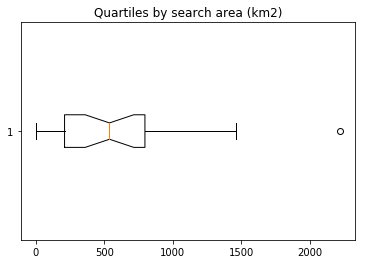

In [11]:
fig, ax = plt.subplots()
ax.set_title('Quartiles by search area (km2)')
ax.boxplot(x=df_sanity_check['search_area_km2'], notch=True, vert=False)

So let's take a look at what the IQR outlier detection brought up.

In [12]:
df_sanity_check[df_sanity_check['possible_iqr_outlier']==True]

,city,dist_from_ctr_ne,dist_from_ctr_sw,search_area_km2,area_quartile,possible_iqr_outlier,z_score
23,Moscow,31.800554,35.45129,2220.463037,top,True,3.54241


Hmm. Okay, looks like Moscow is being detected as an outlier, primarily because it is a HUGE city. So that makes sense.

Now let's take a look at the cities that area +/- 1 standard deviation outside the mean.

Text(0,0.5,'Frequency')

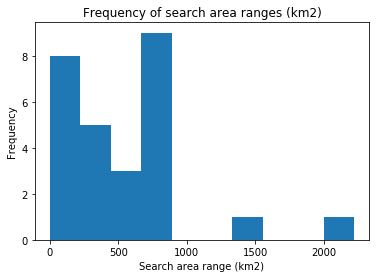

In [13]:
fig2, ax2 = plt.subplots()
ax2.set_title('Frequency of search area ranges (km2)')
ax2.hist(x=sorted(df_sanity_check['search_area_km2']))
ax2.set_xlabel('Search area range (km2)')
ax2.set_ylabel('Frequency')

In [14]:
df_sanity_check[abs(df_sanity_check['z_score'])>=1.0]

,city,dist_from_ctr_ne,dist_from_ctr_sw,search_area_km2,area_quartile,possible_iqr_outlier,z_score
10,Helsinki,0.622382,0.622401,0.618574,bottom,False,-1.215256
19,Rotterdam,0.006541,0.006541,0.000077,bottom,False,-1.216581
23,Moscow,31.800554,35.451290,2220.463037,top,True,3.542410
26,"Chicago, Illinois",18.376116,36.710079,1457.424863,top,False,1.907034


__Interesting!__ Looks like my home city of Chicago is a possible outlier based on z-score due to its large size. But since Chicago is my point of comparison, we must include it.

Let's examine the other cities more closely. Again, Moscow shows up because it is an absolutely _gigantic_ city. Since I'm comparing only to smaller European cities, rather than to all cities in the world, this result is not super surprising. I'd get the same result if I put Shanghai or Hong Kong or Brasília in there instead. (Incidentally, my company does have an office in Shanghai!).

Looks like Rotterdam and Helsinki have extremely small bounding boxes, according to their areas. These look like errors in the OSM database. Since I'm already considering Amsterdam and The Hague, I think we can safely drop Rotterdam. Helsinki I'm also going to drop because it has almost the same z-score as Rotterdam. Guess Finland is off the table for now. (Sorry, Finland!)

In [15]:
df_cities = df_cities[~df_cities['city'].isin(['Helsinki', 'Rotterdam'])].reset_index().drop(columns=['index'])

## Get Foursquare API venue data
Okay, now it's time to get our hands on some venue data. I'll need to use my Foursquare API credentials, which I have stored in a `.json` file in my workspace. I'll access those as a streaming body in the hidden cell below.

In [16]:
# The code was removed by Watson Studio for sharing.

I also want to get a list of all the venue categories that are available. Since I'm only looking for food-related venues, I'm going to grab the master category list, prune out any non-food categories, and use the `search` endpoint to return only those venue types. Let's take a look at the different master categories available.

In [17]:
url = 'https://api.foursquare.com/v2/venues/categories?&client_id=%s&client_secret=%s&v=%s' % (CLIENT_ID, CLIENT_SECRET, VERSION)
results = requests.get(url).json()
df_categories = pd.DataFrame(results['response']['categories'])
df_categories

,categories,icon,id,name,pluralName,shortName
0,"[{'categories': [], 'name': 'Amphitheater', 'i...",{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7104d754a06370d81259,Arts & Entertainment,Arts & Entertainment,Arts & Entertainment
1,"[{'categories': [{'categories': [], 'name': 'C...",{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06372d81259,College & University,Colleges & Universities,College & Education
2,"[{'categories': [], 'name': 'Christmas Market'...",{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06373d81259,Event,Events,Event
3,"[{'categories': [], 'name': 'Afghan Restaurant...",{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06374d81259,Food,Food,Food
4,"[{'categories': [{'categories': [], 'name': 'B...",{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06376d81259,Nightlife Spot,Nightlife Spots,Nightlife
5,"[{'categories': [{'categories': [], 'name': 'B...",{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06377d81259,Outdoors & Recreation,Outdoors & Recreation,Outdoors & Recreation
6,"[{'categories': [], 'name': 'Animal Shelter', ...",{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06375d81259,Professional & Other Places,Professional & Other Places,Professional
7,"[{'categories': [], 'name': 'Assisted Living',...",{'prefix': 'https://ss3.4sqi.net/img/categorie...,4e67e38e036454776db1fb3a,Residence,Residences,Residence
8,"[{'categories': [], 'name': 'ATM', 'icon': {'p...",{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06378d81259,Shop & Service,Shops & Services,Shops
9,"[{'categories': [{'categories': [], 'name': 'A...",{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06379d81259,Travel & Transport,Travel & Transport,Travel


It looks like I'm only interested in the master category __Food__, with id __4d4b7105d754a06374d81259__. I'll grab only those venue categories that fall under 'Food', at list index 3. According to the API documentation, if you pass a `categoryId` that is a top-level category, the search will also return all the sub-categories in that top-level category. This should be enough to build a detailed model and return well-defined results from the `search` endpoint.

In [18]:
CATEGORY_ID = df_categories[df_categories['name']=='Food']['id'].iloc[0]

I'm going to recycle some code from the Toronto assignment in __Week 3__, but I'll reconfigure it to accept a `ne` and `sw` parameter so I can search within the bounding box for each city. This will give me the top 100 overall results for that city, and not just within the radius near a certain latitude and longitude. As a result, we can drop the `ll` parameter since it is not required for an `intent=browse` query if passing `ne` and `sw` arguments.

In [19]:
def get_venues_in_bounding_box(cities, nes, sws, category_id=CATEGORY_ID):
    venues = []
    intent = 'browse' # Required intent parameter in order to get venues in a bounding box or generalized region instead of around one point.
    n = len(list(cities))
    for city, lat, lng, ne, sw in tqdm(iterable=zip(cities, lats, lngs, nes, sws),
                                         desc=('-> Fetching top 100 venues from Foursquare (tot. {} cities)'.format(n)),
                                         total=n, ascii=True, leave=True):            
        # Form the request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id=%s&client_secret=%s&v=%s&intent=%s&categoryId=%s&ne=%s,%s&sw=%s,%s&limit=%s' % \
        (CLIENT_ID, CLIENT_SECRET, VERSION, intent, category_id, ne[0], ne[1], sw[0], sw[1], 100)
        
        results = requests.get(url).json()['response']['groups'][0]['items']
        if city == 'Rotterdam': print(requests.get(url).json())
        
        for e in results: venues.append([city, e['venue']['name'], e['venue']['categories'][0]['name']])
    
    return venues

In [20]:
time_start = dt.now()
df_venues = pd.DataFrame(get_venues_in_bounding_box(df_cities['city'], df_cities['ne'], df_cities['sw']), columns=['city', 'venue_name', 'venue_category'])
time_end = dt.now()
print('-> Done! Took', (time_end-time_start).total_seconds(), 'seconds.')

-> Fetching top 100 venues from Foursquare (tot. 25 cities): 100%|##########| 25/25 [00:16<00:00,  1.49it/s]

-> Done! Took 16.782949 seconds.


Okay, let's take a look at the top 20 venue types returned globally. (By the by, you can use the `tqdm` package to track progress on any Python iterable, including those called with the `zip` method, which is what I've done in the function above. Useful in evaluating whether or not your API call is timing out.)

In [21]:
print('Fetched %s venues in %s unique venue categories.' % (df_venues[['venue_name']].count()[0], len(df_venues['venue_category'].unique())))
top20_venue_categories=df_venues.groupby(['venue_category']).count()[['venue_name']].sort_values(by=['venue_name'], ascending=False).head(20)
top20_venue_categories

Fetched 2491 venues in 116 unique venue categories.


,venue_name
venue_category,
Café,281
Italian Restaurant,227
Restaurant,151
French Restaurant,141
Pizza Place,124
Bakery,103
Japanese Restaurant,78
Burger Joint,76
Tapas Restaurant,62


I'm going to create a heatmap to see how cities compare with each of these categories. Let's make a list and keep only those rows in the original DataFrame matching the top 20 venue list.

In [22]:
top20_venue_categories = top20_venue_categories.index.tolist()

In [23]:
df_count_top20 = df_venues[df_venues['venue_category'].isin(top20_venue_categories)].set_index('city').groupby(['city', 'venue_category'], as_index=True).count().reset_index()
df_count_top20 = df_count_top20.pivot(index='city', columns='venue_category', values='venue_name').fillna(0)

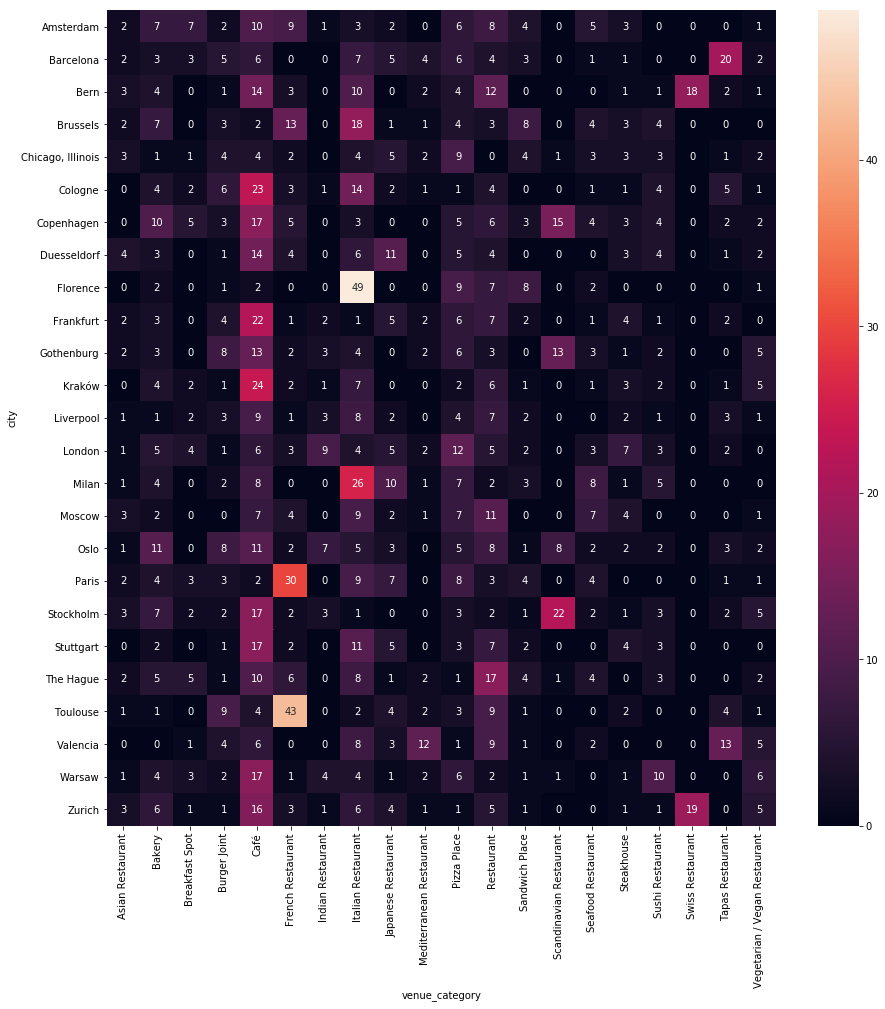

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(df_count_top20, annot=True)

So across all of our cities, these are the most common venues. Let's one-hot encode these so that I can track them by city and do the actual analysis on the data. Pretty similar to the Week 3 assignment, except instead of neighborhoods we are going to key on cities. Let's also take a look at the total number of hits returned, because one-hot encoding each venue category by city will mean I need to find the __arithmetic mean__ of each venue's encoding. By definition, averaging according to number of venues will dilute smaller cities because smaller cities will have vastly fewer total venues.

However, this effect is counteracted by the limitations of the Foursquare API. Since Foursquare only returns 100 venues per query, and since I'm searching in a bounding box, I am going to get a representative sample for each city's venues and venue categories __as long as each city has returned 100 venues__. This implies that the number of venues per square kilometer returned from smaller cities is higher than that returned for larger cities (i.e., the venues are more densely packed, but still representative of the queried city, and also normalized).

Let's take a look at the histogram.

Text(0,0.5,'Number of cities')

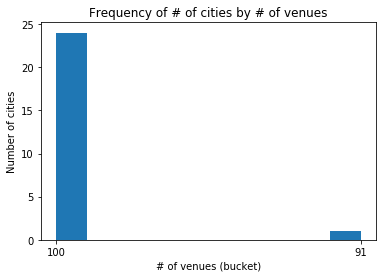

In [25]:
df_underrep = df_venues.groupby('city').count().drop(columns=['venue_category'])
fig3, ax3 = plt.subplots()
ax3.set_title('Frequency of # of cities by # of venues')
ax3.hist(x=df_underrep)
ax3.set_xlabel('# of venues (bucket)')
ax3.set_ylabel('Number of cities')

Looks like there is only one city with less than 100 venues, let's see which one it is.

In [26]:
df_underrep[~df_underrep['venue_name'].isin([100])]

,venue_name
city,
Bern,91


In [27]:
underrep_factor = ((100-df_underrep[~df_underrep['venue_name'].isin([100])].loc['Bern'][0])/100) + 1
underrep_factor

1.0900000000000001

So it looks like __Bern, Switzerland__ is underrepresented. We can either drop Bern from the dataset, or scale up its one-hot encoding by the underrepresentation factor. I think I will try the latter, since I liked Bern the last time I visted it and want to be able to include it in my analysis.  

## Classfication
Let's one-hot encode these so that I can track them by city and do the actual analysis on the data. Pretty similar to the Week 3 assignment, except instead of neighborhoods we are going to key on cities.

In [28]:
df_onehot_venues = pd.get_dummies(df_venues[['venue_category']], prefix='', prefix_sep='')
df_onehot_venues['city'] = df_venues['city']

# Rearrange the columns. This can be done using reindex together with Numpy hstack to push the city column to the very left of the remaining columns (using set-difference).
df_onehot_venues = df_onehot_venues.reindex(columns=np.hstack((['city'], df_onehot_venues.columns.difference(['city']))))

df_grouped = df_onehot_venues.groupby('city').mean().reset_index()
df_grouped.head()

,city,African Restaurant,American Restaurant,Apple Wine Pub,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Basque Restaurant,...,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Trattoria/Osteria,Turkish Restaurant,Tuscan Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,Amsterdam,0.00,0.00,0.0,0.00,0.020000,0.01,0.0,0.070000,0.0,...,0.010000,0.0,0.0,0.00,0.010000,0.0,0.0,0.010000,0.01,0.0
1,Barcelona,0.00,0.00,0.0,0.01,0.020000,0.00,0.0,0.030000,0.0,...,0.010000,0.0,0.0,0.00,0.000000,0.0,0.0,0.020000,0.00,0.0
2,Bern,0.00,0.00,0.0,0.00,0.032967,0.00,0.0,0.043956,0.0,...,0.010989,0.0,0.0,0.00,0.010989,0.0,0.0,0.010989,0.00,0.0
3,Brussels,0.00,0.00,0.0,0.01,0.020000,0.01,0.0,0.070000,0.0,...,0.030000,0.0,0.0,0.01,0.000000,0.0,0.0,0.000000,0.00,0.0
4,"Chicago, Illinois",0.01,0.05,0.0,0.00,0.030000,0.02,0.0,0.010000,0.0,...,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.020000,0.02,0.0


In [29]:
df_grouped.shape

(25, 117)

Now we need to scale-up Bern's one-hot encoded average to normalize it for the 11% underrepresentation.

In [30]:
df_grouped = df_grouped.set_index('city')
df_grouped[df_grouped.index == 'Bern'] = df_grouped[df_grouped.index == 'Bern']*underrep_factor
df_grouped = df_grouped.reset_index()

I'm also going to sort by top 15 venue types, as I think this will give me a good initial glimpse of what each city's food scene is like.

In [31]:
def get_most_common_venues(city, result_limit): return city.iloc[1:].sort_values(ascending=False).index.values[0:result_limit]

In [32]:
# Top-n venue types to calculate
n = 15

# Join the neighborhood list with empty frequency columns that are generated using a compact list comprehension together with old-style string formatting.
df_city_venues_sorted = df_grouped[['city']].join(pd.DataFrame(columns=(['venue_category_top%02d' % (i+1) for i in range(0, n)])))

# Iterate over each row (i.e., each neighborhood and get the top-n most frequent venue type)
for r in range(0, df_city_venues_sorted.shape[0]): df_city_venues_sorted.iloc[r, 1:] = get_most_common_venues(df_grouped.iloc[r, :], n)
    
df_city_venues_sorted

,city,venue_category_top01,venue_category_top02,venue_category_top03,venue_category_top04,venue_category_top05,venue_category_top06,venue_category_top07,venue_category_top08,venue_category_top09,venue_category_top10,venue_category_top11,venue_category_top12,venue_category_top13,venue_category_top14,venue_category_top15
0,Amsterdam,Café,French Restaurant,Restaurant,Bakery,Breakfast Spot,Pizza Place,Seafood Restaurant,Deli / Bodega,Sandwich Place,Italian Restaurant,Steakhouse,Japanese Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Caribbean Restaurant
1,Barcelona,Tapas Restaurant,Spanish Restaurant,Italian Restaurant,Pizza Place,Café,Japanese Restaurant,Burger Joint,Mediterranean Restaurant,Restaurant,Bakery,Sandwich Place,Breakfast Spot,Donut Shop,Fish & Chips Shop,Gastropub
2,Bern,Swiss Restaurant,Café,Restaurant,Italian Restaurant,Pizza Place,Bakery,Creperie,Asian Restaurant,French Restaurant,Gastropub,Tapas Restaurant,Mediterranean Restaurant,Burger Joint,Turkish Restaurant,Modern European Restaurant
3,Brussels,Italian Restaurant,French Restaurant,Sandwich Place,Bakery,Belgian Restaurant,Pizza Place,Seafood Restaurant,Sushi Restaurant,Fish & Chips Shop,Burger Joint,Steakhouse,Restaurant,Thai Restaurant,Friterie,Bistro
4,"Chicago, Illinois",Pizza Place,New American Restaurant,American Restaurant,Japanese Restaurant,Italian Restaurant,Sandwich Place,Burger Joint,Café,Fried Chicken Joint,Diner,Mexican Restaurant,Seafood Restaurant,Hot Dog Joint,Sushi Restaurant,Steakhouse
5,Cologne,Café,Italian Restaurant,Burger Joint,Tapas Restaurant,German Restaurant,Restaurant,Sushi Restaurant,Bakery,Vietnamese Restaurant,French Restaurant,Snack Place,Gastropub,Kebab Restaurant,Japanese Restaurant,Middle Eastern Restaurant
6,Copenhagen,Café,Scandinavian Restaurant,Bakery,Restaurant,Breakfast Spot,Pizza Place,French Restaurant,Seafood Restaurant,Sushi Restaurant,Sandwich Place,Steakhouse,Italian Restaurant,Burger Joint,Tapas Restaurant,Vegetarian / Vegan Restaurant
7,Duesseldorf,Café,Japanese Restaurant,Italian Restaurant,Vietnamese Restaurant,Pizza Place,Restaurant,French Restaurant,Asian Restaurant,Sushi Restaurant,Ramen Restaurant,Mexican Restaurant,Steakhouse,Bakery,Thai Restaurant,Greek Restaurant
8,Florence,Italian Restaurant,Pizza Place,Trattoria/Osteria,Sandwich Place,Restaurant,Bistro,Diner,Seafood Restaurant,Café,American Restaurant,Bakery,Vegetarian / Vegan Restaurant,Dim Sum Restaurant,Food Truck,Burger Joint
9,Frankfurt,Café,German Restaurant,Restaurant,Pizza Place,Japanese Restaurant,Burger Joint,Steakhouse,Greek Restaurant,Apple Wine Pub,Bakery,Sandwich Place,Ramen Restaurant,Gastropub,Mediterranean Restaurant,Korean Restaurant


I considered using both SVM and DBSCAN clustering methods in order to find the similarity between each of these cities. However, k-means is a good, quick, general-purpose clustering algorithm that has worked well for the similar assignment in Week 3. Because the data I can get from the Standard API call is not very interesting, it would be best to stick with k-means for now. If I ever end up fleshing out this assignment and making use of the Premium calls in the Foursquare API--for example, getting only those venues that my friends have rated highly--then it may be worth looking into other methods. However, for now, let's keep our model simple.

I considered the Week 3 assignment and realized that I probably won't want to use only 7 or 8 means, since this would probably not help me make a decision. I don't want to find a city that is an exact _replica_ of Chicago, but rather I want to have a few options to choose from. I want to find the 2 or 3 most similar cities, food-wise. So we may need to crank up the number of means to __9__. This is because currently there are 25 cities in my list. 25/3 is roughly 9.

In [33]:
k = 9
n_init = 20

df_grouped_clust = df_grouped.drop('city', 1)

print('Fitting %s-means model, please wait...' % k, end='')
start_time = dt.now()
k_means_model = KMeans(init='k-means++', n_clusters=k, n_init=n_init).fit(df_grouped_clust)
stop_time = dt.now()
print('done. Fitting took', round((stop_time-start_time).total_seconds(), 1), 'seconds.')

Fitting 9-means model, please wait...done. Fitting took 0.4 seconds.


In [34]:
# Insert the cluster name (i.e., number into the city rank DataFrame
df_city_venues_sorted.insert(0, 'cluster', k_means_model.labels_)

In [35]:
df_city_venues_sorted.set_index('city')
df_map = df_cities.merge(right=df_city_venues_sorted, how='left', on='city')
df_map

,boundingbox,city,country,geojson_string,lat,lng,ne,sw,cluster,venue_category_top01,...,venue_category_top06,venue_category_top07,venue_category_top08,venue_category_top09,venue_category_top10,venue_category_top11,venue_category_top12,venue_category_top13,venue_category_top14,venue_category_top15
0,"[50.6865573, 51.0065573, 4.191697, 4.511697]",Brussels,Belgium,"{'type': 'Polygon', 'coordinates': [[[4.191697...",50.846557,4.351697,"(51.0065573, 4.511697)","(50.6865573, 4.191697)",0,Italian Restaurant,...,Pizza Place,Seafood Restaurant,Sushi Restaurant,Fish & Chips Shop,Burger Joint,Steakhouse,Restaurant,Thai Restaurant,Friterie,Bistro
1,"[46.9190326, 46.9901527, 7.2943145, 7.4955563]",Bern,Switzerland,"{'type': 'Polygon', 'coordinates': [[[7.294314...",46.948271,7.451451,"(46.9901527, 7.4955563)","(46.9190326, 7.2943145)",6,Swiss Restaurant,...,Bakery,Creperie,Asian Restaurant,French Restaurant,Gastropub,Tapas Restaurant,Mediterranean Restaurant,Burger Joint,Turkish Restaurant,Modern European Restaurant
2,"[47.3202203, 47.4346662, 8.4480061, 8.6254413]",Zurich,Switzerland,"{'type': 'Polygon', 'coordinates': [[[8.448006...",47.372394,8.542333,"(47.4346662, 8.6254413)","(47.3202203, 8.4480061)",6,Swiss Restaurant,...,Thai Restaurant,Restaurant,Japanese Restaurant,Asian Restaurant,French Restaurant,Snack Place,Diner,American Restaurant,Food Truck,Gastropub
3,"[55.5267243, 55.8467243, 12.4100724, 12.7300724]",Copenhagen,Denmark,"{'type': 'Polygon', 'coordinates': [[[12.41007...",55.686724,12.570072,"(55.8467243, 12.7300724)","(55.5267243, 12.4100724)",3,Café,...,Pizza Place,French Restaurant,Seafood Restaurant,Sushi Restaurant,Sandwich Place,Steakhouse,Italian Restaurant,Burger Joint,Tapas Restaurant,Vegetarian / Vegan Restaurant
4,"[50.8304494, 51.0849743, 6.7725303, 7.162028]",Cologne,Germany,"{'type': 'Polygon', 'coordinates': [[[6.772530...",50.938361,6.959974,"(51.0849743, 7.162028)","(50.8304494, 6.7725303)",2,Café,...,Restaurant,Sushi Restaurant,Bakery,Vietnamese Restaurant,French Restaurant,Snack Place,Gastropub,Kebab Restaurant,Japanese Restaurant,Middle Eastern Restaurant
5,"[51.0654018, 51.3854018, 6.6163137, 6.9363137]",Duesseldorf,Germany,"{'type': 'Polygon', 'coordinates': [[[6.616313...",51.225402,6.776314,"(51.3854018, 6.9363137)","(51.0654018, 6.6163137)",2,Café,...,Restaurant,French Restaurant,Asian Restaurant,Sushi Restaurant,Ramen Restaurant,Mexican Restaurant,Steakhouse,Bakery,Thai Restaurant,Greek Restaurant
6,"[49.9506444, 50.2706444, 8.5220917, 8.8420917]",Frankfurt,Germany,"{'type': 'Polygon', 'coordinates': [[[8.522091...",50.110644,8.682092,"(50.2706444, 8.8420917)","(49.9506444, 8.5220917)",2,Café,...,Burger Joint,Steakhouse,Greek Restaurant,Apple Wine Pub,Bakery,Sandwich Place,Ramen Restaurant,Gastropub,Mediterranean Restaurant,Korean Restaurant
7,"[48.6184485, 48.9384485, 9.0200132, 9.3400132]",Stuttgart,Germany,"{'type': 'Polygon', 'coordinates': [[[9.020013...",48.778449,9.180013,"(48.9384485, 9.3400132)","(48.6184485, 9.0200132)",2,Café,...,Greek Restaurant,Steakhouse,Sushi Restaurant,Pizza Place,Irish Pub,Swabian Restaurant,Turkish Restaurant,Vietnamese Restaurant,Spanish Restaurant,Trattoria/Osteria
8,"[41.3170353, 41.4679135, 2.0524977, 2.2283555]",Barcelona,Spain,"{'type': 'MultiPolygon', 'coordinates': [[[[2....",41.382894,2.177432,"(41.4679135, 2.2283555)","(41.3170353, 2.0524977)",5,Tapas Restaurant,...,Japanese Restaurant,Burger Joint,Mediterranean Restaurant,Restaurant,Bakery,Sandwich Place,Breakfast Spot,Donut Shop,Fish & Chips Shop,Gastropub
9,"[39.2784496, 39.5666202, -0.4325512, -0.2725205]",Valencia,Spain,"{'type': 'MultiPolygon', 'coordinates': [[[[-0...",39.469901,-0.375951,"(39.5666202, -0.2725205)","(39.2784496, -0.4325512)",5,Tapas Restaurant,...,Italian Restaurant,Café,Vegetarian / Vegan Restaurant,Burger Joint,Japanese Restaurant,Gastropub,Argentinian Restaurant,Seafood Restaurant,American Restaurant,Diner


## Visualize

Now that I have the coordinates of each of the cities, it's time to plot them on a map. Because these cities are so spread out over Europe, I'll use the average of all latitudes and the average of all longitudes as the starting position for the map. I'll also zoom _waaay_ out.

In [36]:
lat_avg = np.average(df_map[~df_map['city'].isin(['Chicago, Illinois'])]['lat'])
lng_avg = np.average(df_map[~df_map['city'].isin(['Chicago, Illinois'])]['lng'])

eu_map = folium.Map(location=[lat_avg, lng_avg], zoom_start=5)

I'll also need to come up with a color palette for each of our clusters. Here's where the instructor's nifty code comes in handy.

In [37]:
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]

colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

I'll also need to define a little function that will return the color from the `rainbow` array and pass it back to the GeoJson layer. This function keys on the GeoJSON `feature` data and looks at a designated key in the `properties` field.

In [38]:
# Each call of this function takes the 'feature' field passed to it from the folium.GeoJson.style_function() method for the current polygon being drawn (i.e., the current FSA being added to the layer from the GeoJSON file).
def get_city_cluster_color(feature):
    
    # If the 'CFSAUID' key in the 'properties' field matches one of the FSAs that we have clustered in our analysis (remember that we dropped some FSAs in the suburbs earlier on), we'll want to style this polygon.
    if(feature['properties']['city'] in df_map['city'].values):
        
        # First, let's get the cluster label from the appropriate row for that FSA.
        cluster = df_map[df_map['city'] == feature['properties']['city']]['cluster'].iloc[0]
        
        # Then, we'll need to select the appropriate color from the rainbow object containing our color hex codes.
        fill_color = rainbow[cluster]
        
        # Coloring a polygon is done with a JSON style object. In Python we can return a dict representing this object with the relevant styling fields.
        return {
            'fillColor': fill_color,
            'fillOpacity': 0.6,
            'color': '#ffffff',
            'weight': 1
        }
    
    # If the key does not match, it means folium is drawing the polygon of an FSA we initially dropped from our analysis, or didn't exist in the Wikipedia table. Still, it's useful to have the boundaries
    # of the FSAs abutting our analysis, so let's color in those polygons with a slight hint of black.
    else:
        return {
            'fillColor': '#000000',
            'fillOpacity': 0.10,
            'color': '#ffffff',
            'weight': 1
        }


First, I want to find the actual cluster number that Chicago falls into. I want to embed that as a tooltip, along with the rest of the DataFrame into the GeoJSON data so that I can render it as data inside the `GeoJsonTooltip` object in Folium.

In [39]:
chicago_cluster = df_map[df_map['city']=='Chicago, Illinois']['cluster'].iloc[0]

Finally, I'll need to embed the GeoJSON data in one master `dict`, since the `geojson_string` field actually only contains information for the `geometry` field part of the GeoJSON standard.

In [40]:
geojson_data = {'type': 'FeatureCollection', 'name': 'eating_my_way_through_europe_geojson', 'features': []}
chicago_cluster = df_map[df_map['city']=='Chicago, Illinois']['cluster'].iloc[0]
for boundingbox, city, country, geojson_string, lat, lng, cluster, top01, top02, top03, top04, top05 in \
zip(df_map['boundingbox'], df_map['city'], df_map['country'], df_map['geojson_string'], df_map['lat'], df_map['lng'], df_map['cluster'], \
    df_map['venue_category_top01'], df_map['venue_category_top02'], df_map['venue_category_top03'], df_map['venue_category_top04'], df_map['venue_category_top05']):
    geojson_data['features'].append(
        {'type': 'Feature',
          'geometry': geojson_string,
          'properties': {'city': city,
                         'cluster': cluster,
                         'in_chicago_cluster': 'YES' if cluster==chicago_cluster else 'NO',
                         'country': country,
                         'lat': lat,
                         'lng': lng,
                         'venue_category_top01': top01,
                         'venue_category_top02': top02,
                         'venue_category_top03': top03,
                         'venue_category_top04': top04,
                         'venue_category_top05': top05,
                        }       
         }
    )

Now let's plot all the GeoJSON data and see what comes out! Recall that we've subsituted the bounding boxes in cities that do not have GeoJSON shapes. So those cities will appear as rectangles.

In [41]:
folium.GeoJson(
    geojson_data,
    name='eating_my_way_through_europe_geojson',
    style_function=get_city_cluster_color,
    tooltip=folium.features.GeoJsonTooltip(fields=['city', 'country', 'lat', 'lng', 'cluster', 'in_chicago_cluster', 'venue_category_top01', 'venue_category_top02', 'venue_category_top03', 'venue_category_top04', 'venue_category_top05'],
                                           aliases=['City', 'Country', 'Latitude', 'Longitude', 'In cluster #', 'Similar to Chicago?', 'Most freq. venue type', '2nd most freq. venue type', '3rd most freq. venue type', '4th most freq. venue type', '5th most freq. venue type'])
    ).add_to(eu_map)


eu_map

### Et voilà!

Above is the complete map of European cities and how similar they are to Chicago in terms of food. As a last step, let's get the final list of cities that are most similar to Chicago (i.e., in the same cluster).

In [42]:
for e in list(df_map[df_map['cluster'].isin([chicago_cluster])]['city']): print(e)

Liverpool
London
Chicago, Illinois


Great! I'll pack my bags!

<img src='https://media1.tenor.com/images/cad15e3da1cb9c2bca3421f795b10f5b/tenor.gif?itemid=3953501' />